# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [36]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [37]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [38]:
u = np.ones(3)

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [39]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [40]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [41]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [42]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [43]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the .pkl file
with open('data/taxicab.pkl', 'rb') as file:
    data = pickle.load(file)

# Convert to DataFrame
data_reset = [series.reset_index(drop=True) for series in data]
df = pd.concat(data_reset, axis=1, ignore_index=True)
df.columns = [f'series_{i}' for i in range(len(data))]
print("DataFrame shape:", df.shape)
print("First few rows:\n", df.head())

DataFrame shape: (38344, 1000)
First few rows:
             series_0      series_1           series_2           series_3  \
0  Outside Manhattan       Midtown            Chelsea  Greenwich Village   
1  Outside Manhattan      Kips Bay    Upper East Side        East Harlem   
2  Outside Manhattan      Kips Bay    Upper East Side            Midtown   
3  Outside Manhattan  East Village  Outside Manhattan  Outside Manhattan   
4  Outside Manhattan  East Village  Outside Manhattan  Outside Manhattan   

            series_4           series_5         series_6         series_7  \
0  Battery Park City            Midtown  Upper East Side  Upper West Side   
1       East Village            Midtown  Upper East Side  Upper East Side   
2       East Village            Midtown  Upper East Side  Upper East Side   
3           Gramercy  Flatiron District  Upper East Side          Midtown   
4           Gramercy       East Village          Midtown          Midtown   

            series_8           s

# 1 Determine State Space and Clean Sequences

Summary: Identified 37 unique Manhattan neighborhoods (e.g., 'midtown', 'hell's kitchen', 'chelsea') from all 1000 columns (series_0 to series_999) after cleaning the data. Cleaning involved converting names to lowercase, removing whitespace, dropping NaNs, and excluding 'outside manhattan'. This defines the states for the Markov chain, ensuring only valid Manhattan neighborhoods are analyzed.

Key Result: State space includes 37 neighborhoods like 'battery park city', 'central park', 'midtown', etc. (see output: "State space (Manhattan neighborhoods)").

Purpose: Provides the foundation for the Markov chain by defining valid states and preparing cleaned sequences for transition calculations.

In [44]:
# Get unique neighborhoods from all columns, excluding 'outside manhattan'
all_neighborhoods = set()
for col in df.columns:
    all_neighborhoods.update(df[col].str.lower().str.strip().dropna())
manhattan_neighborhoods = sorted([x for x in all_neighborhoods if x != 'outside manhattan'])
states = manhattan_neighborhoods
S = len(states)
print("\nState space (Manhattan neighborhoods):", states)
print("Number of states:", S)


State space (Manhattan neighborhoods): ['battery park city', 'central park', 'chelsea', 'chinatown', 'civic center', 'east harlem', 'east village', 'ellis island', 'financial district', 'flatiron district', 'governors island', 'gramercy', 'greenwich village', 'harlem', "hell's kitchen", 'inwood', 'kips bay', 'liberty island', 'little italy', 'lower east side', 'marble hill', 'midtown', 'morningside heights', 'murray hill', 'noho', 'nolita', "randall's island", 'roosevelt island', 'soho', 'stuyvesant town', 'theater district', 'tribeca', 'two bridges', 'upper east side', 'upper west side', 'washington heights', 'west village']
Number of states: 37


# 2 Compute Transition Matrix, Plot Heatmap, Find Common Routes

Summary: Calculated a 37×37 transition matrix where each entry (i,j) is the probability of a cab moving from neighborhood j to i, using transitions from all 1000 sequences. A heatmap visualizes these probabilities (darker = more frequent), and the top 5 routes were identified by highest probabilities.

Key Result: The matrix shows probabilities (e.g., 0.37 for midtown → midtown). Top routes include 'liberty island → gramercy' (1.00, likely due to sparse data), 'ellis island → little italy' (0.67), and 'upper east side → upper east side' (0.46). The heatmap highlights frequent transitions like midtown → midtown.

Purpose: Quantifies how often cabs move between neighborhoods (frequencies) and identifies popular routes.


Transition Matrix:
                      battery park city  central park  chelsea  chinatown  \
battery park city                 0.26          0.00     0.01       0.01   
central park                      0.00          0.14     0.01       0.00   
chelsea                           0.07          0.03     0.34       0.05   
chinatown                         0.01          0.00     0.00       0.13   
civic center                      0.01          0.00     0.00       0.03   
east harlem                       0.00          0.02     0.00       0.00   
east village                      0.02          0.01     0.03       0.09   
ellis island                      0.00          0.00     0.00       0.00   
financial district                0.09          0.01     0.01       0.06   
flatiron district                 0.01          0.01     0.03       0.01   
governors island                  0.00          0.00     0.00       0.00   
gramercy                          0.01          0.01     0.02      

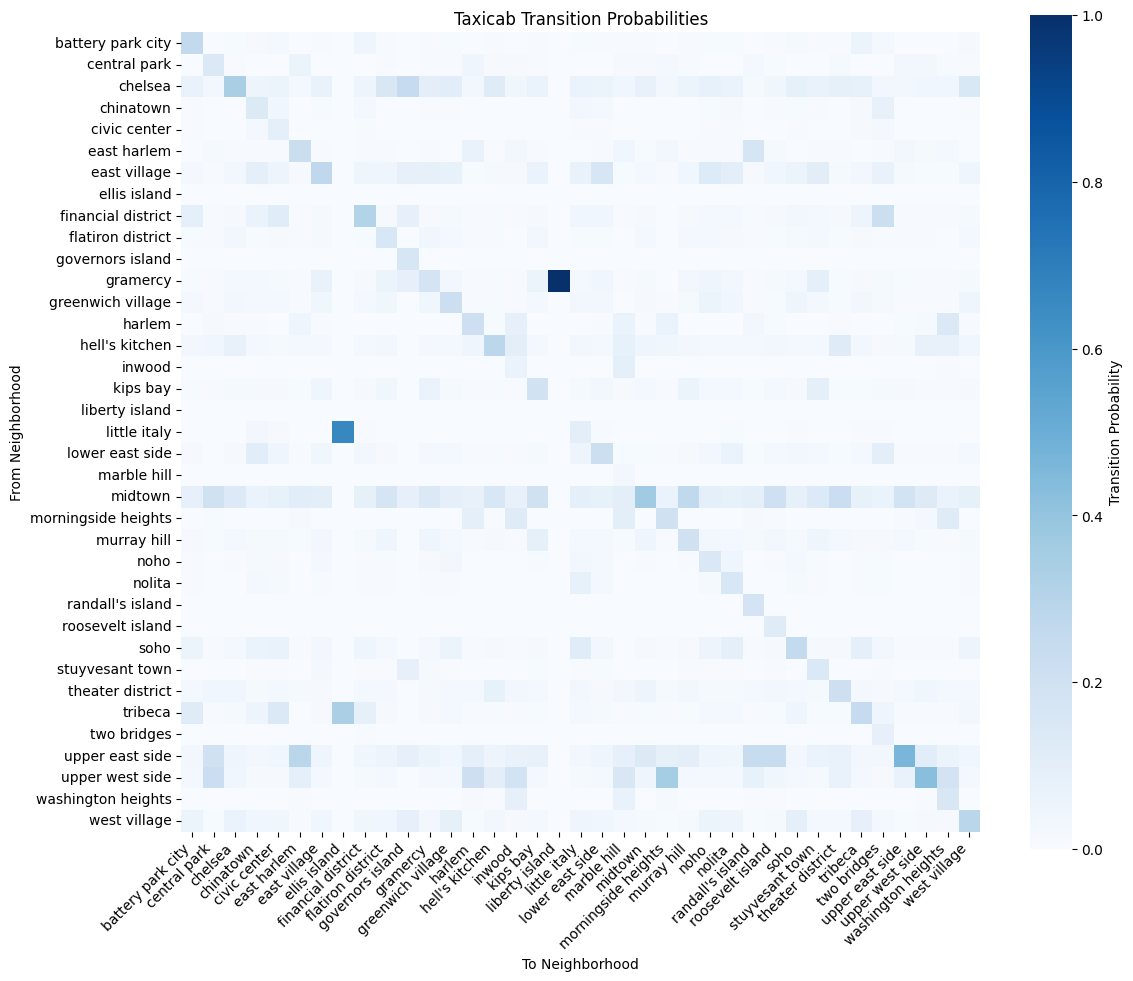


Most common routes:
liberty island -> gramercy: 1.00
ellis island -> little italy: 0.67
upper east side -> upper east side: 0.46
upper west side -> upper west side: 0.43
midtown -> midtown: 0.37


In [45]:
tr_counts = np.zeros((S, S))
for col in df.columns:
    col_seq = df[col].str.lower().str.strip().dropna()
    col_seq = col_seq[col_seq.isin(manhattan_neighborhoods)].values
    for t in range(1, len(col_seq)):
        if col_seq[t-1] in states and col_seq[t] in states:
            index_from = states.index(col_seq[t-1])
            index_to = states.index(col_seq[t])
            tr_counts[index_to, index_from] += 1

# Transition probabilities (rows sum to 1)
sums = tr_counts.sum(axis=0, keepdims=True)
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums!=0)
tr_df = pd.DataFrame(np.round(tr_pr, 2), index=states, columns=states)
print("\nTransition Matrix:\n", tr_df)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, cmap='Blues', square=True, xticklabels=states, yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})
plt.title('Taxicab Transition Probabilities')
plt.xlabel('To Neighborhood')
plt.ylabel('From Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Most common routes
print("\nMost common routes:")
tr_flat = tr_pr.flatten()
top_indices = np.argsort(tr_flat)[-5:][::-1]
for idx in top_indices:
    i, j = divmod(idx, S)
    print(f"{states[j]} -> {states[i]}: {tr_pr[i, j]:.2f}")

# 3 Why Taxicabs Are Most Likely Order 1

Summary: Justified using a first-order Markov chain, where the next pickup depends only on the current dropoff neighborhood. This is because cab drivers respond to local demand (e.g., a dropoff in Hell's Kitchen leads to a nearby pickup), and prior trips have minimal influence. Higher-order models (e.g., order 2) would overcomplicate the model with a large state space (37²=1369 states) without clear benefits.

Key Result: The output explains that order 1 is appropriate due to immediate demand driving pickups, avoiding overfitting from higher-order models.

Purpose: Clarifies why a simple Markov model fits the data, addressing the modeling choice for both frequency analysis and prediction.

# 4 Forecast from Hell's Kitchen

Summary: Predicted the probability of a cab’s location after 2, 3, 5, and 10 trips, starting from Hell's Kitchen, by iteratively applying the transition matrix. The top 3 neighborhoods with highest probabilities are reported for each step.

Key Result: After 2 trips: 19% midtown, 12% hell’s kitchen, 11% chelsea; after 3 trips: 19% midtown, 12% upper east side, 10% chelsea; after 5 and 10 trips, similar patterns with midtown dominating (19%). Probabilities stabilize quickly, showing spread to high-demand areas.

Purpose: Uses the Markov chain for prediction, showing where a cab is likely to be in the short term, addressing your question about predicting future locations.

In [46]:
try:
    hk_idx = states.index("hell's kitchen")
except ValueError:
    print("Warning: Hell's Kitchen not in states. Using first state instead.")
    hk_idx = 0
initial = np.zeros(S)
initial[hk_idx] = 1
print("\nForecasts from Hell's Kitchen:")
vec = initial
for i in range(10):
    vec = tr_pr @ vec
    if i+1 in [2, 3, 5, 10]:
        top3 = np.argsort(vec)[-3:][::-1]
        print(f"After {i+1} trips:", {states[idx]: round(vec[idx], 2) for idx in top3})


Forecasts from Hell's Kitchen:
After 2 trips: {'midtown': np.float64(0.19), "hell's kitchen": np.float64(0.12), 'chelsea': np.float64(0.11)}
After 3 trips: {'midtown': np.float64(0.19), 'upper east side': np.float64(0.12), 'chelsea': np.float64(0.1)}
After 5 trips: {'midtown': np.float64(0.19), 'upper east side': np.float64(0.13), 'chelsea': np.float64(0.1)}
After 10 trips: {'midtown': np.float64(0.19), 'upper east side': np.float64(0.14), 'chelsea': np.float64(0.1)}


# 5 Long-Run Distribution

Summary: Iterated the transition matrix to find the steady-state distribution, showing the proportion of time cabs spend in each neighborhood in the long run, regardless of starting point. The top 5 neighborhoods are reported.

Key Result: Converged at step 7 with top neighborhoods: midtown (19%), upper east side (13%), chelsea (10%), upper west side (9%), hell’s kitchen (6%). This indicates cabs spend the most time in busy areas like midtown.

Purpose: Predicts where cabs spend most time over the long term, answering which neighborhoods are taxi hubs.

In [47]:
vec = np.ones(S) / S
for i in range(50):
    vec_new = tr_pr @ vec
    if np.max(np.abs(vec_new - vec)) < 0.001:
        print(f"\nConverged at step {i+1}")
        break
    vec = vec_new
top5 = np.argsort(vec)[-5:][::-1]
print("Long-run distribution (top 5 neighborhoods):", {states[idx]: round(vec[idx], 2) for idx in top5})


Converged at step 7
Long-run distribution (top 5 neighborhoods): {'midtown': np.float64(0.19), 'upper east side': np.float64(0.13), 'chelsea': np.float64(0.1), 'upper west side': np.float64(0.09), "hell's kitchen": np.float64(0.06)}
